In [4]:
import cv2
import os
import dlib
import matplotlib.pyplot as plt
import numpy as np

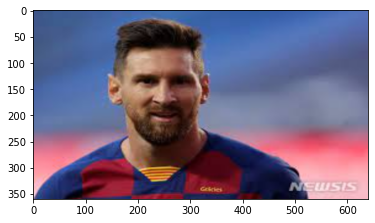

In [62]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/king.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640,360))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
detector_hog = dlib.get_frontal_face_detector()

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [7]:
print(dlib_rects)

rectangles[[(167, 98) (322, 253)]]


<function matplotlib.pyplot.show(close=None, block=None)>

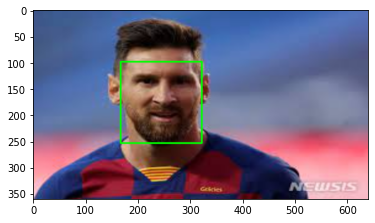

In [63]:
img_show = img_bgr.copy()
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

In [9]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


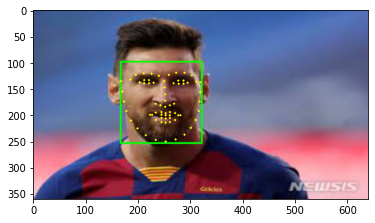

In [64]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)    #yellow
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

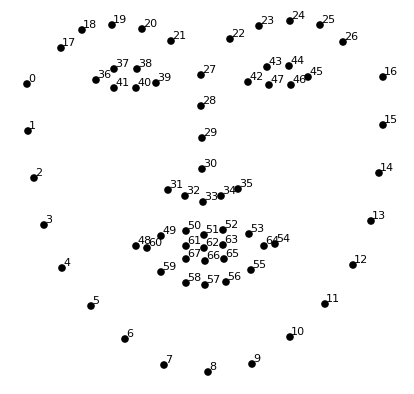

볼은 '턱','눈','입','코' 사이에 있으므로, 2, 36, 48, 30 이용

In [66]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print('(x,y) : (%d,%d)' %(x,y))
    print('(w,h) : (%d,%d)' %(w,h))

(252, 172)
(x,y) : (252,172)
(w,h) : (156,156)


In [67]:
# sticker resize
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(156, 156, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

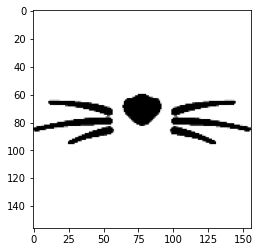

In [68]:
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show

In [69]:
# 원본 이미지에 스티커 이미지 추가하기 위한 좌표 조정
refined_x = x - w//2
refined_y = y - h//2
print('(x,y) : (%d,%d)' %(refined_x, refined_y))

(x,y) : (174,94)


In [70]:
print(img_sticker.shape)
print('(x,y) : (%d,%d)' %(refined_x,refined_y))

(156, 156, 3)
(x,y) : (174,94)


In [71]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

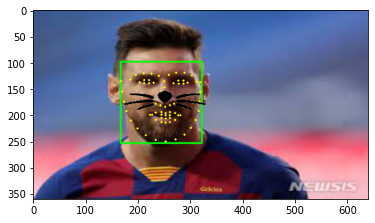

In [72]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()